<font color=Green>
    
# **4.5 Presentación del análisis**

</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_crudo = pd.read_csv(r'dow_jones_index.data')
df_crudo

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


### El parámetro _converters_ de la función `pd.read_csv()` nos permite aplicar una operación en las columnas.

In [3]:
columnas = ['accion', 'fecha', 'precio']

df = pd.read_csv(r'dow_jones_index.data',
                 usecols=[1,2,6],
                 header=0,
                 names = columnas,
                 parse_dates=['fecha'],
                 converters={'precio':
                             lambda x: 
                             float(x.replace('$', ''))
                            }
                )
df

,accion,fecha,precio
0,AA,2011-01-07,16.42
1,AA,2011-01-14,15.97
2,AA,2011-01-21,15.79
3,AA,2011-01-28,16.13
4,AA,2011-02-04,17.14
...,...,...,...
745,XOM,2011-05-27,82.63
746,XOM,2011-06-03,81.18
747,XOM,2011-06-10,79.78
748,XOM,2011-06-17,79.02


### Empecemos por entender los datos contenidos en el csv.

## <font color=#003d5c> _¿Qué período en el tiempo representan los datos?_ </font>

In [4]:
df.fecha.dt.year.value_counts()

2011    750
Name: fecha, dtype: int64

+ Las datos pertenecen al año 2011.

In [5]:
df.fecha.dt.month.value_counts()

4    150
1    120
2    120
3    120
5    120
6    120
Name: fecha, dtype: int64

In [6]:
df.fecha.dt.month_name().value_counts()

April       150
January     120
February    120
March       120
May         120
June        120
Name: fecha, dtype: int64

+ Los datos se distribuyen desde Enero a Junio del 2011: _Primer semestre del año._
+ En el mes de Abril hay 30 registros más que en el resto de los meses: _¿Por qué?._

In [7]:
df['mes'] = df.fecha.dt.month_name()

filtro1 = df['mes'] == 'April'

filtro2 = df['mes'] == 'May'

In [8]:
df[filtro1].groupby('accion')['mes'].value_counts()

accion  mes  
AA      April    5
AXP     April    5
BA      April    5
BAC     April    5
CAT     April    5
CSCO    April    5
CVX     April    5
DD      April    5
DIS     April    5
GE      April    5
HD      April    5
HPQ     April    5
IBM     April    5
INTC    April    5
JNJ     April    5
JPM     April    5
KO      April    5
KRFT    April    5
MCD     April    5
MMM     April    5
MRK     April    5
MSFT    April    5
PFE     April    5
PG      April    5
T       April    5
TRV     April    5
UTX     April    5
VZ      April    5
WMT     April    5
XOM     April    5
Name: mes, dtype: int64

In [ ]:
df[filtro2].groupby('accion')['mes'].value_counts()

+ En Abril las acciones cotizaron 5 veces porque el mes tuvo 5 semanas.

## <font color=#003d5c> _¿Cuáles acciones en promedio tuvieron la mayor y la menor cotización?_ </font>

In [9]:
df.groupby('accion').agg({'precio': [np.mean, np.std]})

precio          
            mean       std
accion                    
AA       16.5044  0.772922
AXP      46.7124  2.396248
BA       73.4480  3.087631
BAC      13.0516  1.417382
CAT     103.1520  6.218651
CSCO     17.8992  1.984095
CVX     101.1756  5.267066
DD       52.8736  2.367048
DIS      41.2496  1.882473
GE       19.7840  0.912022
HD       36.5600  1.270213
HPQ      41.5364  4.263754
IBM     163.1016  5.730211
INTC     21.4352  1.072272
JNJ      62.6236  2.846177
JPM      44.4996  2.095094
KO       65.3264  1.970774
KRFT     32.5576  1.570584
MCD      77.2704  3.004153
MMM      91.6980  2.692709
MRK      34.3604  1.666357
MSFT     25.9208  1.416407
PFE      19.8216  0.915085
PG       64.0020  1.828795
T        29.6268  1.369257
TRV      59.1600  2.649218
UTX      84.0332  2.985547
VZ       36.4696  0.932820
WMT      53.9128  1.555639
XOM      82.1116  3.137743

In [10]:
df.groupby('accion').agg({'precio': [np.mean, np.std]}).sort_values([('precio', 'mean')], ascending=False)

precio          
            mean       std
accion                    
IBM     163.1016  5.730211
CAT     103.1520  6.218651
CVX     101.1756  5.267066
MMM      91.6980  2.692709
UTX      84.0332  2.985547
XOM      82.1116  3.137743
MCD      77.2704  3.004153
BA       73.4480  3.087631
KO       65.3264  1.970774
PG       64.0020  1.828795
JNJ      62.6236  2.846177
TRV      59.1600  2.649218
WMT      53.9128  1.555639
DD       52.8736  2.367048
AXP      46.7124  2.396248
JPM      44.4996  2.095094
HPQ      41.5364  4.263754
DIS      41.2496  1.882473
HD       36.5600  1.270213
VZ       36.4696  0.932820
MRK      34.3604  1.666357
KRFT     32.5576  1.570584
T        29.6268  1.369257
MSFT     25.9208  1.416407
INTC     21.4352  1.072272
PFE      19.8216  0.915085
GE       19.7840  0.912022
CSCO     17.8992  1.984095
AA       16.5044  0.772922
BAC      13.0516  1.417382

+ En promedio IBM tuvo el mayor precio: 163,10 USD
+ En promedio BAC tuvo el menor precio: 13,05 USD

## <font color=#003d5c> _¿Cuáles acciones tuvieron la mayor y menor variación de precio?_ </font>

In [11]:
df.groupby('accion').agg({'precio': [np.mean, np.std]}).sort_values([('precio', 'std')], ascending=False)

precio          
            mean       std
accion                    
CAT     103.1520  6.218651
IBM     163.1016  5.730211
CVX     101.1756  5.267066
HPQ      41.5364  4.263754
XOM      82.1116  3.137743
BA       73.4480  3.087631
MCD      77.2704  3.004153
UTX      84.0332  2.985547
JNJ      62.6236  2.846177
MMM      91.6980  2.692709
TRV      59.1600  2.649218
AXP      46.7124  2.396248
DD       52.8736  2.367048
JPM      44.4996  2.095094
CSCO     17.8992  1.984095
KO       65.3264  1.970774
DIS      41.2496  1.882473
PG       64.0020  1.828795
MRK      34.3604  1.666357
KRFT     32.5576  1.570584
WMT      53.9128  1.555639
BAC      13.0516  1.417382
MSFT     25.9208  1.416407
T        29.6268  1.369257
HD       36.5600  1.270213
INTC     21.4352  1.072272
VZ       36.4696  0.932820
PFE      19.8216  0.915085
GE       19.7840  0.912022
AA       16.5044  0.772922

+ CAT es la acción más volátil, con una desviación tipica de 6,22 USD
+ AA es la acción más consistente, con una desviación típica de 0,77 USD

### Ya que conocemos la acción más volátil, podemos preguntarnos si el precio de esta acción tiene correlación con el precio de otras acciones.

### Deseamos estudiar una o varias acciones particulares pero el conjunto de datos no presenta un formato conveniente para esto. 

### La función `df.pivot_table()` nos genera un nuevo `DataFrame` reorganizado con la forma que deseemos.

In [12]:
df_nuevo = df.pivot_table(index='fecha', 
                          columns='accion', 
                          values='precio')
df_nuevo

accion,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
fecha,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


### Ahora podemos centrarnos en estudiar el comportamiento en el tiempo de cada acción.

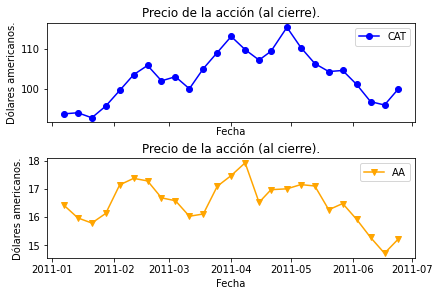

In [15]:
fig, (pan1,pan2) = plt.subplots(2,1, sharex=True, constrained_layout=True)

pan1.plot(df_nuevo.index, df_nuevo.CAT, 
         color = 'blue', 
         marker = 'o', 
         linestyle = 'solid',
         label = 'CAT')


pan2.plot(df_nuevo.index, df_nuevo.AA, 
          color = 'orange', 
          marker = 'v', 
          linestyle = 'solid',
          label='AA')


for pan in fig.get_axes():
    pan.set(
            xlabel='Fecha', 
            ylabel='Dólares americanos.', 
            title='Precio de la acción (al cierre).')

pan1.legend()
pan2.legend()

+ Los precios de ambas acciones presentan un comportamiento alcista hasta Abril -con un ligero declive en las primeras semanas de Marzo-, a partir de ahí el precio baja hasta la última semana de Junio.

## <font color=#003d5c> _¿Existe alguna correlación entre los precios de CAT y el resto de las acciones?_ </font>

In [16]:
df_nuevo.corr()

accion,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
accion,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


In [17]:
df_nuevo.corr().loc['CAT']

accion
AA      0.695727
AXP     0.255515
BA      0.627205
BAC    -0.131058
CAT     1.000000
CSCO   -0.375140
CVX     0.889416
DD      0.902856
DIS     0.712870
GE      0.463054
HD      0.617550
HPQ    -0.153858
IBM     0.665304
INTC    0.141202
JNJ    -0.072006
JPM     0.403562
KO      0.699167
KRFT    0.185959
MCD     0.106767
MMM     0.806474
MRK    -0.030892
MSFT   -0.325324
PFE     0.666647
PG     -0.226021
T       0.482533
TRV     0.778439
UTX     0.734655
VZ      0.890315
WMT    -0.170677
XOM     0.803195
Name: CAT, dtype: float64

In [18]:
df_nuevo.corr().loc['CAT'][df_nuevo.corr().loc['CAT'] > 0.8]

accion
CAT    1.000000
CVX    0.889416
DD     0.902856
MMM    0.806474
VZ     0.890315
XOM    0.803195
Name: CAT, dtype: float64

In [19]:
corr_pos = df_nuevo.corr().loc['CAT'][df_nuevo.corr().loc['CAT'] > 0.8].sort_values(ascending=False)
corr_pos

accion
CAT    1.000000
DD     0.902856
VZ     0.890315
CVX    0.889416
MMM    0.806474
XOM    0.803195
Name: CAT, dtype: float64

+ Las acciones DD, VZ, CVX, MMM, XOM presentan una fuerte correlación positiva con CAT.

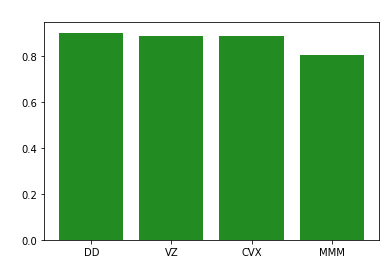

In [21]:
valores = corr_pos[1:5]

plt.bar(valores.index, valores.values, color='forestgreen')

plt.plot()

plt.xlabel("Acciones", color = 'white')

plt.ylabel("Coeficiente de correlación.", color = 'white')

plt.title('Correlación entre CAT y el resto.', color = 'white')

plt.show()

In [ ]:
corr_neg = df_nuevo.corr().loc['CAT'][df_nuevo.corr().loc['CAT'] < 0].sort_values(ascending=True)
corr_neg

In [ ]:
valores = corr_neg[1:5]

plt.bar(valores.index, valores.values, color='brown')

plt.plot()

plt.xlabel("Acciones")

plt.ylabel("Coeficiente de correlación.")

plt.title('Correlación entre CAT y el resto.')

plt.show()

+ Ninguna acción presenta una correlación negativa significante con CAT.